In [1]:
#### 1- Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
RANDOM_SEED=21

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
#### Adjusting display settings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=np.inf)


In [3]:
#### 2- Importing Dataset
df=pd.read_csv("CarDekho.csv")
print("Dataset imported successfully.")

Dataset imported successfully.


In [4]:
#### 3- Data OVERVIEW
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
pd.options.display.float_format = '{:.0f}'.format

In [6]:
print("Information about the dataset: ")
df.info()

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
print("Statical summary of the dataset: ")
df.describe()

Statical summary of the dataset: 


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411,15411,15411,15411,15411,15411,15411
mean,6,55616,20,1486,101,5,774971
std,3,51619,4,521,43,1,894128
min,0,100,4,793,38,0,40000
25%,4,30000,17,1197,74,5,385000
50%,6,50000,20,1248,88,5,556000
75%,8,70000,23,1582,117,5,825000
max,29,3800000,34,6592,626,9,39500000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

SEPERATING COLUMNS FOR BETTER READABILITY

In [11]:
categorical_cols=[cat for cat in df.columns if df[cat].dtype=="object"]
numerical_cols=[num for num in df.columns if df[num].dtype!="object"]

print("Number of categorical columns:", len(categorical_cols))
print("Number of numerical columns:", len(numerical_cols))

Number of categorical columns: 6
Number of numerical columns: 7


CHECK DISTRUBUTION OF UNIQUE VALUES IN DATASET

In [12]:
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")

Unique values in 'car_name': 121
Unique values in 'brand': 32
Unique values in 'model': 120
Unique values in 'vehicle_age': 24
Unique values in 'km_driven': 3688
Unique values in 'seller_type': 3
Unique values in 'fuel_type': 5
Unique values in 'transmission_type': 2
Unique values in 'mileage': 411
Unique values in 'engine': 110
Unique values in 'max_power': 342
Unique values in 'seats': 8
Unique values in 'selling_price': 1086


SEATS CAN NOT BE ZERO, LET DROP THAT ROWS



In [13]:
df[df['seats']==0].value_counts().sum()

np.int64(2)

In [14]:
df.drop(df[df["seats"]==0].index,axis=0,inplace=True)

LOOK FOR RATIO OF FEATURES IN DATASET

In [15]:
for col in df.columns:
    print("Ratio of unique values in '{}': {:.2f}%".format(col,df[col].nunique()/df.shape[0]*100))

Ratio of unique values in 'car_name': 0.79%
Ratio of unique values in 'brand': 0.21%
Ratio of unique values in 'model': 0.79%
Ratio of unique values in 'vehicle_age': 0.16%
Ratio of unique values in 'km_driven': 24.20%
Ratio of unique values in 'seller_type': 0.02%
Ratio of unique values in 'fuel_type': 0.03%
Ratio of unique values in 'transmission_type': 0.01%
Ratio of unique values in 'mileage': 2.70%
Ratio of unique values in 'engine': 0.72%
Ratio of unique values in 'max_power': 2.24%
Ratio of unique values in 'seats': 0.05%
Ratio of unique values in 'selling_price': 7.12%


VISUALIZE THE CORRELATION BETWEEN FEATURES AND TARGET VARIABLE

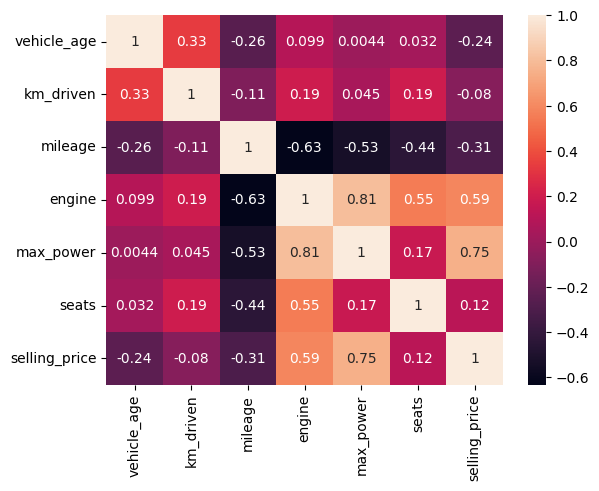

In [ ]:
#### 4- Exploratory Data Analysis (EDA) with VISUALIZATIONS

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

LOOKING FOR OUTLIERS IN NUMERICAL FEATURES

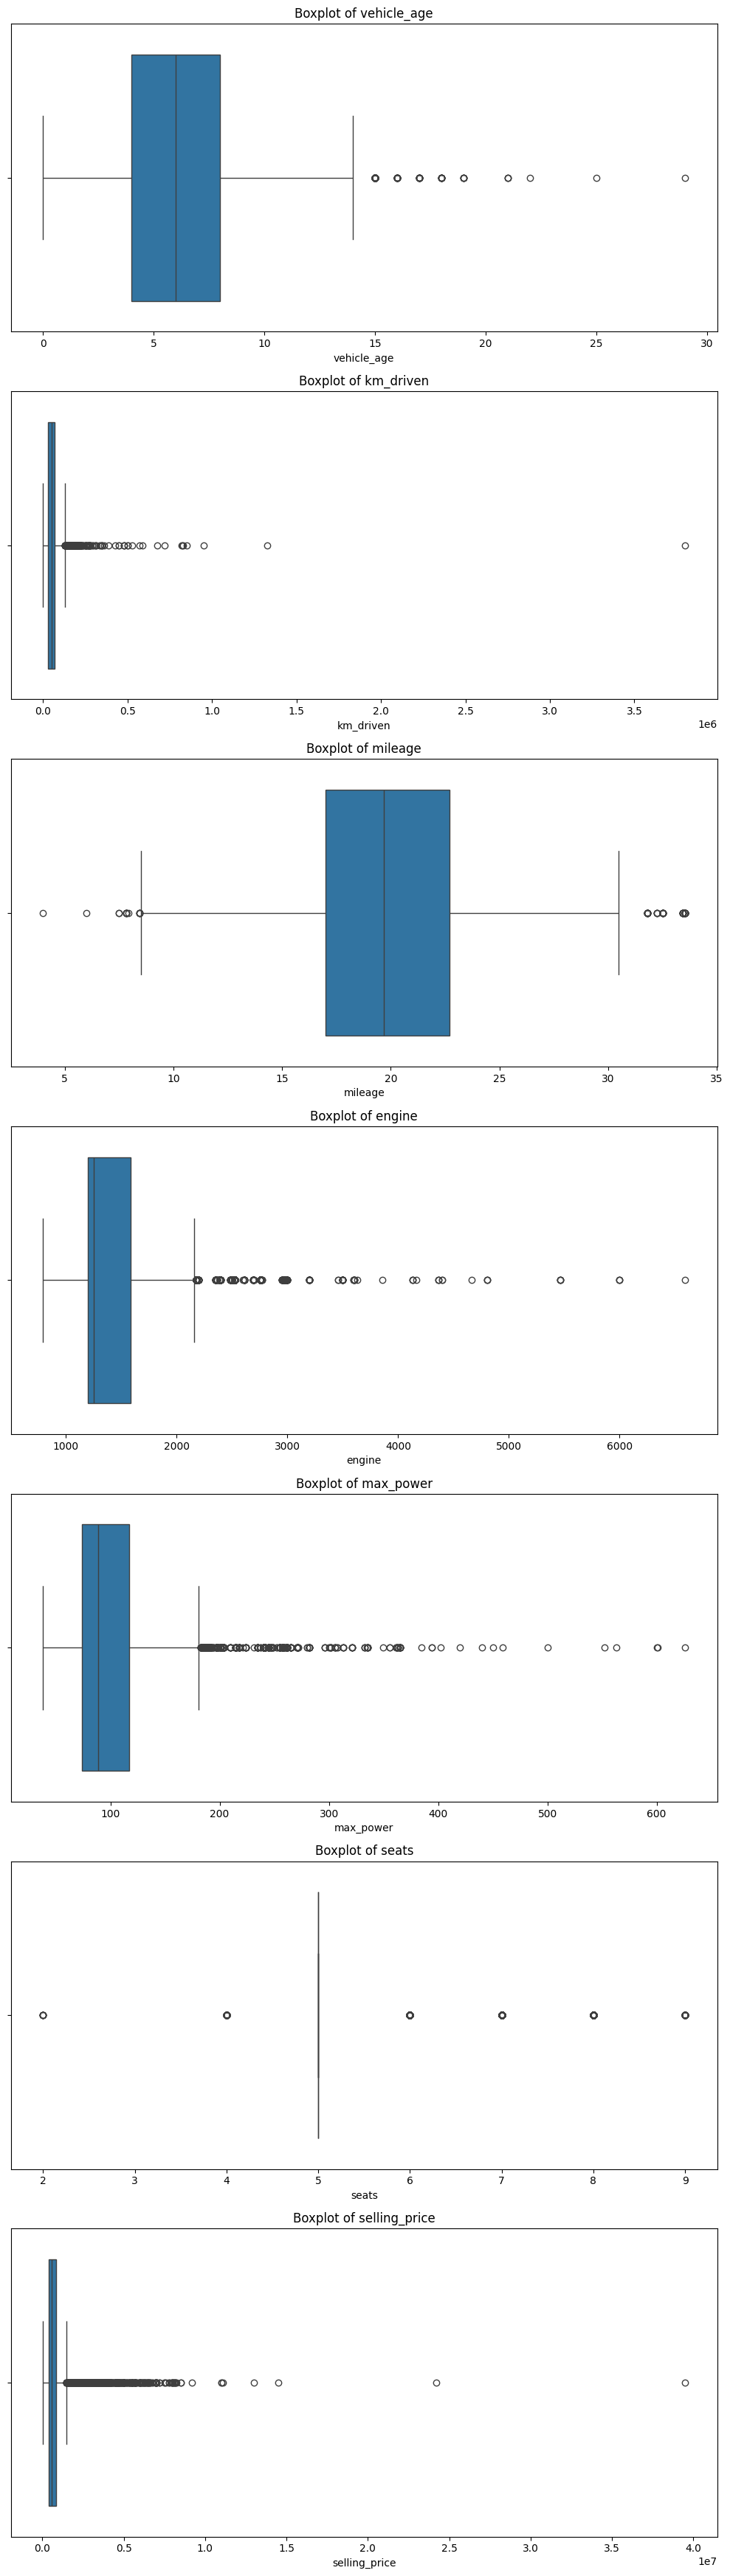

In [17]:
fig,ax=plt.subplots(len(numerical_cols),1,figsize=(10,len(numerical_cols)*5))
ax=ax.flatten()

for i,col in enumerate(numerical_cols):
    sns.boxplot(data=df,x=col,ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

SETTING A FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD

In [ ]:
def check_outliers(data,cols):
    outlier_dict={}
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        outlier_count=data[(data[col]<lower_bound) | (data[col]>upper_bound)].shape[0]
        outlier_dict[col]=outlier_count
    return outlier_dict


In [19]:
check_outliers(df,numerical_cols)

{'vehicle_age': 153,
 'km_driven': 464,
 'mileage': 87,
 'engine': 2103,
 'max_power': 853,
 'seats': 2475,
 'selling_price': 1371}

WE HAVE TOO MANY OUTLIERS IN THE DATASET, WE'LL REMOVE THEM IN TRAINING PHASE

FOR NOW LET'S VISUALIZE THE DISTRIBUTION OF SOME OF CATEGORICAL FEATURES

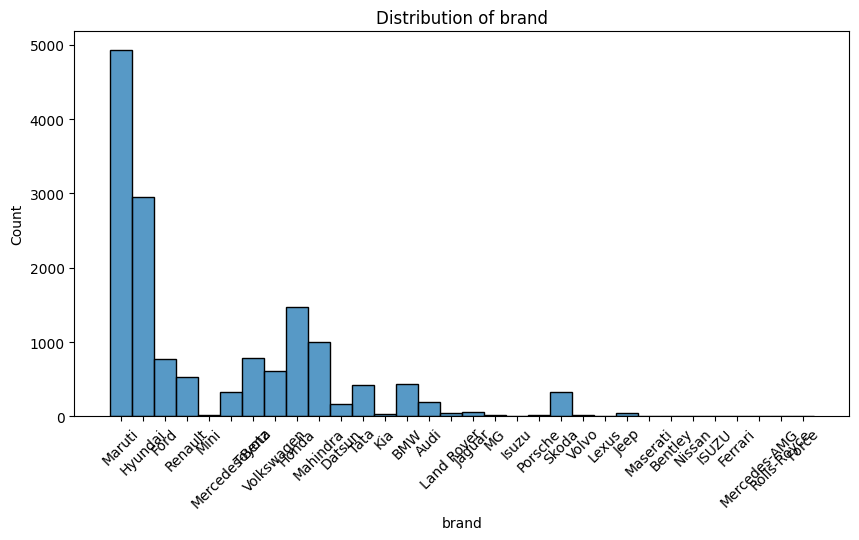

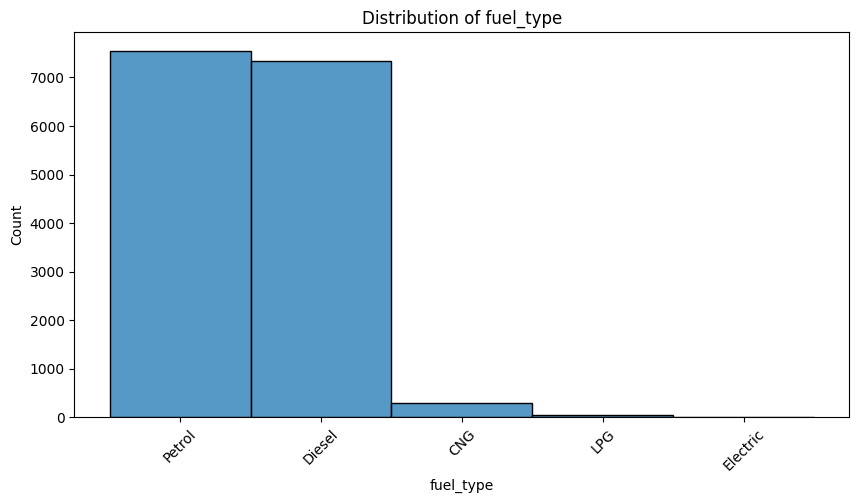

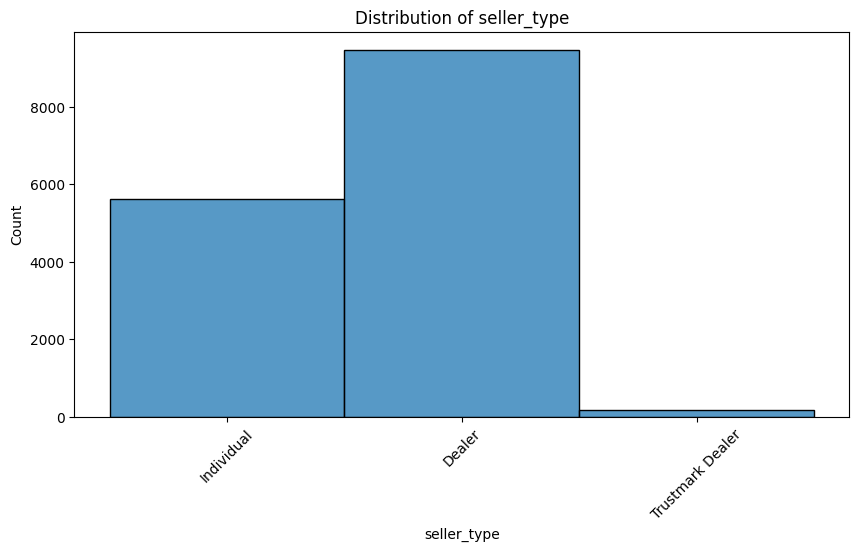

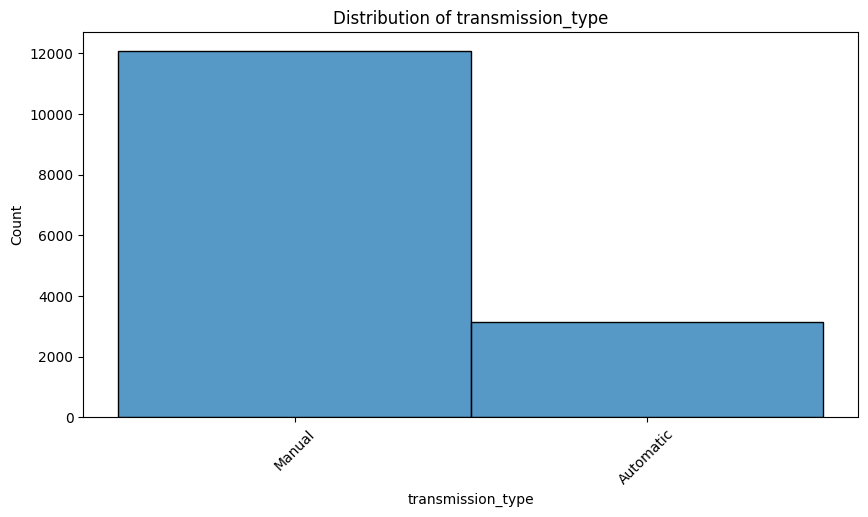

In [38]:
cols_to_distribution=["brand","fuel_type","seller_type","transmission_type"]

for col in cols_to_distribution:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=col,kde=False,discrete=True)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [40]:
print("MARUTI IS THE MOST POPULAR CAR BRAND IN INDIA")
print("PETROL CARS ARE MORE POPULAR THAN DIESEL ONES")
print("MANUAL CARS ARE MORE POPULAR THAN MANUAL ONES")
print("DEALERS SELL MORE CARS THAN INDIVIDUALS")

MARUTI IS THE MOST POPULAR CAR BRAND IN INDIA
PETROL CARS ARE MORE POPULAR THAN DIESEL ONES
MANUAL CARS ARE MORE POPULAR THAN MANUAL ONES
DEALERS SELL MORE CARS THAN INDIVIDUALS


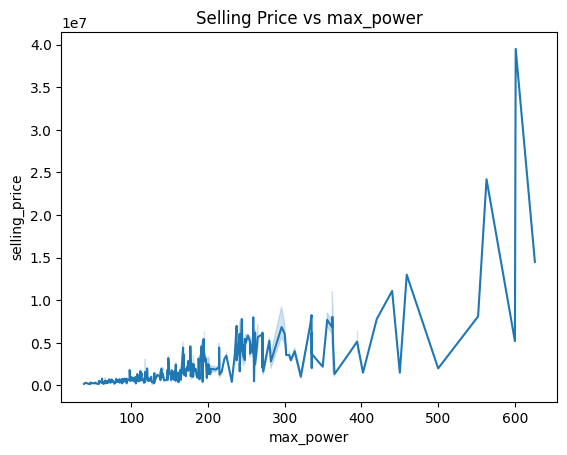

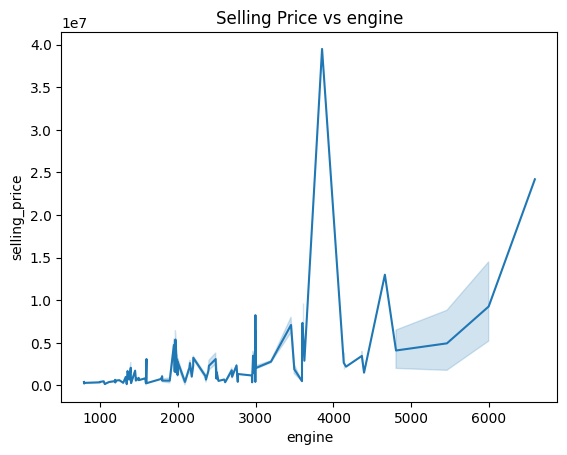

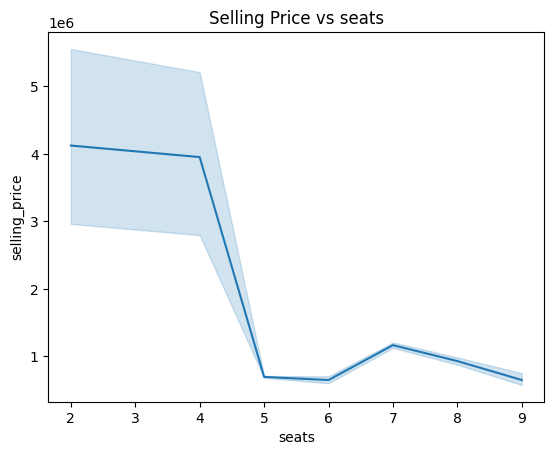

In [21]:
cols_to_lineplot=["max_power","engine","seats"]
for col in cols_to_lineplot:
    sns.lineplot(data=df,x=col,y="selling_price")
    plt.title(f"Selling Price vs {col}")
    plt.show()

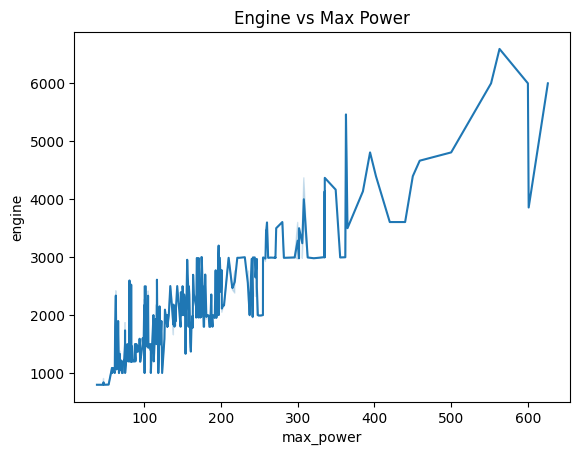

In [22]:
sns.lineplot(data=df,x="max_power",y="engine")
plt.title("Engine vs Max Power")
plt.show()

In [41]:
print("There is a strong positive correlation between engine size and max power of the car.")
print("There is a negative correlation between seats and selling price of the car.")
print("There is a weak positive correlation between engine size and selling price of the car.")
print("There is a weak positive correlation between max power and selling price of the car.")

There is a strong positive correlation between engine size and max power of the car.
There is a negative correlation between seats and selling price of the car.
There is a weak positive correlation between engine size and selling price of the car.
There is a weak positive correlation between max power and selling price of the car.


MACHINE LEARNING MODELING

In [43]:
#### 5- Machine Learning Model Training

print("importing necessary libraries for modeling...")

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

print("Libraries imported successfully for modeling.")


importing necessary libraries for modeling...
Libraries imported successfully for modeling.


FEATURE ENGINEERING AND GETTING RID OF OUTLIERS

In [ ]:
### Get rid of outliers using winsorization method

for col in numerical_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR 
    df[col]=np.where(df[col]<lower_bound,lower_bound,
                     np.where(df[col]>upper_bound,upper_bound,df[col]))

In [25]:
check_outliers(df,numerical_cols)

{'vehicle_age': 0,
 'km_driven': 0,
 'mileage': 0,
 'engine': 0,
 'max_power': 0,
 'seats': 0,
 'selling_price': 0}

SEPERATING TARGET AND FEATURES

In [42]:
### Seperating features and target variable

X=df.drop("selling_price",axis=1)
y=df["selling_price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

In [ ]:
### Encoding categorical features

cols_to_encode=['seller_type','fuel_type','transmission_type']
freq_cols=['car_name','brand','model']

MAKING FREQUENCY ENCODING FOR CATEGORICAL FEATURES

In [ ]:

for col in freq_cols:
    freq=X_train[col].value_counts()/len(X_train[col])
    X_train[col]=X_train[col].map(freq)
    X_test[col]=X_test[col].map(freq)
    freq_mean=freq.mean()
    
    X_train[col].fillna(freq_mean,inplace=True)
    X_test[col].fillna(freq_mean,inplace=True)
    


In [ ]:
### New Column Lists

numerical_cols=[num for num in X_train.columns if X_train[num].dtype!="object"]
categorical_cols=[cat for cat in X_train.columns if X_train[cat].dtype=="object"]


PREPORCESSING THE DATASET FOR MODELING

In [ ]:
### Preprocessing with ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cols_to_encode),
    ('num', StandardScaler(),numerical_cols)
    
], remainder='passthrough')

X_train_enc=preprocessor.fit_transform(X_train)
X_test_enc=preprocessor.transform(X_test)

SETTING PIPELINE AND FUNCTION TO RUN MODELS

In [ ]:
### Model Result Function

def show_metrics(model,y_pred):
    r2=r2_score(y_test,y_pred)
    print(f"R2 Score: {r2:.4f}")
    mse=mean_squared_error(y_test,y_pred)
    print(f"MSE: {mse:.4f}")
    mae=mean_absolute_error(y_test,y_pred)
    print(f"MAE: {mae:.4f}")
    rmse=np.sqrt(mse)
    print(f"RMSE: {rmse:.4f}")

In [ ]:
### Cross Validation Function

def check_CV(model,threshold=0.3):
    y_train_pred=model.predict(X_train_enc)
    y_test_pred=model.predict(X_test_enc)
    
    train_score=r2_score(y_train,y_train_pred)
    test_score=r2_score(y_test,y_test_pred)
    
    print("Train Score: ",round(train_score,2))
    print("Test Score: ",round(test_score))
    
    if abs(train_score - test_score) > threshold and train_score > test_score:
        print("⚠️ Model is Overfitting")
    elif train_score < 0.6 and test_score < 0.6:
        print("⚠️ Model is Underfitting")
    else:
        print("✅ Model is Fit")

In [ ]:
### Run Model Function

def run_model(model):
    model.fit(X_train_enc,y_train)
    y_pred=model.predict(X_test_enc)
    check_CV(model)
    show_metrics(model,y_pred)
    


In [34]:
models_to_run={
    'RandomForestRegressor':RandomForestRegressor(random_state=RANDOM_SEED),
    'AdaBoostRegressor':AdaBoostRegressor(random_state=RANDOM_SEED,estimator=DecisionTreeRegressor()),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor()
}

MODEL RUNNING AND EVALUATION

In [ ]:
### Running Models

for model_name,model in models_to_run.items():
    print(f"Model Name: {model_name}")
    run_model(model)
    print("**"*50)
    

Model Name: RandomForestRegressor
Train Score:  0.99
Test Score:  1
✅ Model is Fit
R2 Score: 0.9287
MSE: 10177159597.2029
MAE: 66342.0134
RMSE: 100881.9092
****************************************************************************************************
Model Name: AdaBoostRegressor
Train Score:  0.99
Test Score:  1
✅ Model is Fit
R2 Score: 0.9237
MSE: 10895028779.1092
MAE: 67234.8591
RMSE: 104379.2545
****************************************************************************************************
Model Name: KNeighborsRegressor
Train Score:  0.95
Test Score:  1
✅ Model is Fit
R2 Score: 0.9221
MSE: 11112533848.2354
MAE: 70617.0362
RMSE: 105416.0038
****************************************************************************************************
Model Name: DecisionTreeRegressor
Train Score:  1.0
Test Score:  1
✅ Model is Fit
R2 Score: 0.8844
MSE: 16495924344.0953
MAE: 82698.5590
RMSE: 128436.4603
********************************************************************************

MODEL TRAINING WITH DIFFERENT ALGORITHMS AND TUNNING HYPERPARAMETERS

In [36]:
params_rfc={
    'n_estimators':[50,70,100],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10]}
params_knn={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
params_ada={
    'n_estimators':[50,60,70,100,200],
    'learning_rate':[0.01,0.1,0.5,1.0],
    'loss':['linear','square','exponential']
}


In [37]:
for model_name,model in models_to_run.items():
    print(f"Tuning hyperparameters for {model_name}")
    if model_name=='RandomForestRegressor':
        param_grid=params_rfc
    elif model_name=='KNeighborsRegressor':
        param_grid=params_knn
    elif model_name=='AdaBoostRegressor':
        param_grid=params_ada
    else:
        print(f"No hyperparameter grid defined for {model_name}. Skipping...")
        continue
    
    grid_search=GridSearchCV(estimator=model,param_grid=param_grid,
                             scoring='r2',cv=5,n_jobs=-1,verbose=1)
    grid_search.fit(X_train_enc,y_train)
    
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    best_model=grid_search.best_estimator_
    
    print(f"Evaluating tuned {model_name}:")
    run_model(best_model)
    print("**"*50)

Tuning hyperparameters for RandomForestRegressor
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for RandomForestRegressor: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Evaluating tuned RandomForestRegressor:
Train Score:  0.97
Test Score:  1
✅ Model is Fit
R2 Score: 0.9333
MSE: 9526219625.5034
MAE: 64643.3736
RMSE: 97602.3546
****************************************************************************************************
Tuning hyperparameters for AdaBoostRegressor
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters for AdaBoostRegressor: {'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 200}
Evaluating tuned AdaBoostRegressor:
Train Score:  0.98
Test Score:  1
✅ Model is Fit
R2 Score: 0.9293
MSE: 10091373142.0688
MAE: 68440.2022
RMSE: 100455.8268
****************************************************************************************************
Tuning hyperparameters for KNeighborsRegre

WE GOT VARIOUS RESULTS WITH DIFFERENT ALGORITHMS. SO WE CAN CHOOSE THE BEST ONE BASED ON OUR REQUIREMENTS.